In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

import numpy as np

from multiprocessing import Pool

import seaborn as sns
import matplotlib.pyplot as plt

from modules.utilities.simulation_utils import run_simulation

In [3]:
MAX_ITER = 5000
MAX_STEPS = 2000
WORLDS = ['treasure_island', 'grid', 'wall', 'double_wall', 'tbone', 'maze']

## Agents Comparison

In [4]:
agents = [
    {'normal': {}},
    {'addicted': {'salience_factor': 1.1}}
]

args = []

for world in WORLDS:
    
    for agent in agents:
        
        args.append(
            (
                agent, 
                world, 
                'agents_comparison', 
                MAX_ITER, 
                MAX_STEPS,
                1000
            
            )
        )

In [5]:
pool = Pool()
sim_summaries = pool.starmap(
    run_simulation,
    args
)
sim_summaries = pd.concat(
    sim_summaries,
    ignore_index=True
)

## Salience Sensitivity Analysis

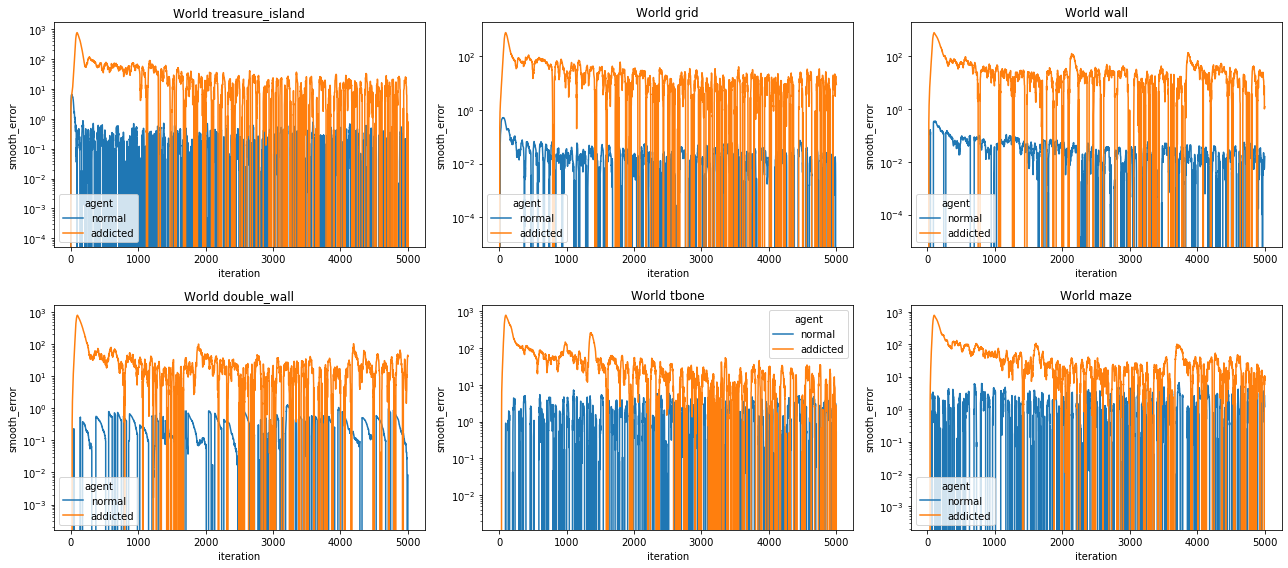

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for world, ax in zip(WORLDS, axs.flatten()):
    
    sns.lineplot(
        x='iteration',
        y='smooth_error',
        hue='agent',
        data=sim_summaries[
            sim_summaries['world'] == world
        ],
        ax=ax
    )
    ax.set_title(f'World {world}')
    
    ax.set_yscale('log')

plt.tight_layout()

plt.show()

In [18]:
x =  np.array(
    [
        ['aa', 'aa'],
        ['aa', 'aa.']
    ]
)
x.shape

(2, 2)

In [19]:
np.argwhere(np.char.find(x, '.') != -1)

array([[1, 1]], dtype=int64)